# Pruebas al modelo de Red Neuronal


In [1]:
import numpy as np
from tensorflow import keras
from extractBofs import extractBofs

2022-03-14 18:39:53.275926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 18:39:53.275958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Carga del modelo

In [2]:
model = keras.models.load_model("BOF_nn_model.h5")

2022-03-14 18:39:58.352923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-14 18:39:58.352957: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-14 18:39:58.352981: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pavilion13-neon): /proc/driver/nvidia/version does not exist
2022-03-14 18:39:58.353735: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180)]             0         
                                                                 
 normalization (Normalizatio  (None, 180)              0         
 n)                                                              
                                                                 
 dense (Dense)               (None, 360)               65160     
                                                                 
 dense_1 (Dense)             (None, 540)               194940    
                                                                 
 dense_2 (Dense)             (None, 360)               194760    
                                                                 
 dense_3 (Dense)             (None, 180)               64980     
                                                             

## Obtención de BOFs

In [4]:
# En la siguiente línea ingresa el nombre de la nube de puntos a utilizar
pcd_name = "1311877889.705060"

# Algunas nubes de puntos con contornos bien definidos
# 1311877889.705060

# Capa con muchos huecos que genera contornos mal definidos
# 1311877884.601154

dataset_dir = "rgbd_dataset_freiburg2_pioneer_slam2"

La imagen RGB de la nube de puntos es:

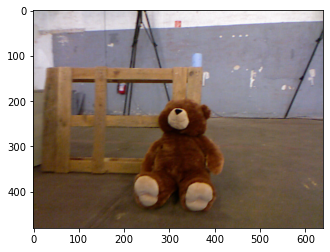

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
bgr_img = cv.imread(dataset_dir+"/rgb_pcd/"+pcd_name+".png")
rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

A continuación se realiza el corte de capas y se obtienen los descriptores BOF de cada contorno detectado.

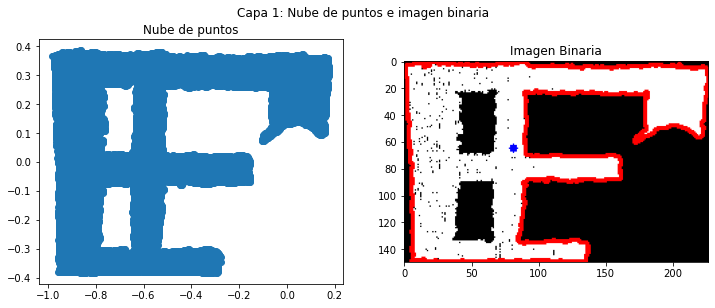

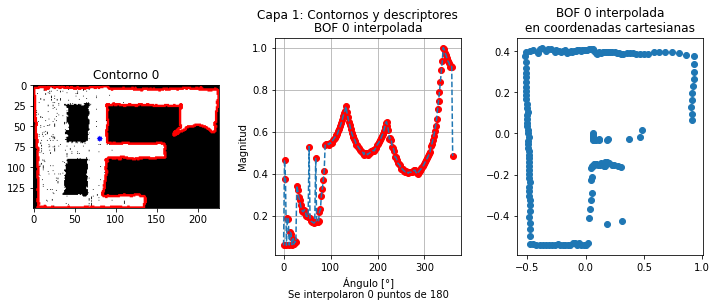

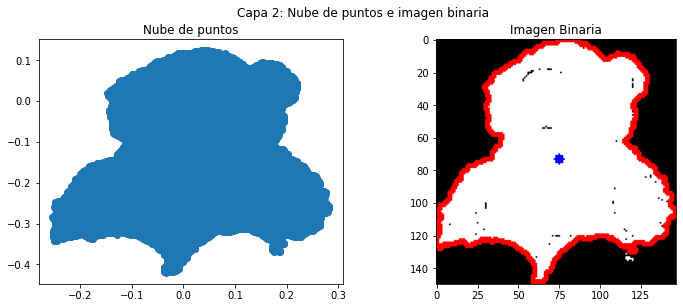

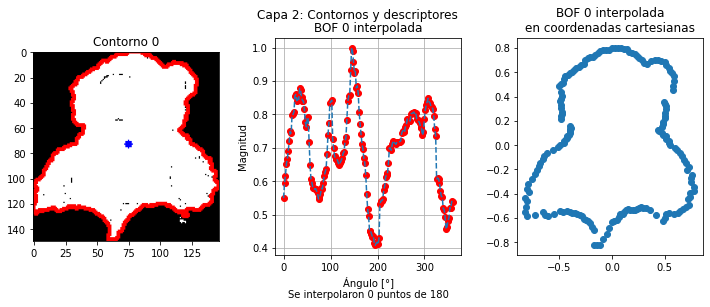

In [6]:
dir_ply_file = dataset_dir+"/pcd/"+pcd_name+".ply"
bofs = extractBofs(dir_ply_file,axis=2,method=2,layers=4, plotBof=True,
    floor_plane=(0,1,0.11,0.57)
)

Se realiza la predicción utilizando el modelo neuronal.

In [7]:
%%time
# Transforma la lista de BOFs a un arreglo de numpy
bofs_np = np.vstack(bofs)
# Obtiene las probabilidades utilizando el modelo neuronal
probas = model.predict(bofs_np)
# Selecciona a la neurona con mayor probabilidad
bofs_classes = np.argmax(probas,axis=1)

CPU times: user 310 ms, sys: 32.8 ms, total: 342 ms
Wall time: 420 ms


Se despliegan los resultados.

In [8]:
for i in range(len(bofs_classes)):
    print(f"La BOF {i} pertenece a la Zona {bofs_classes[i]+1}")

La BOF 0 pertenece a la Zona 3
La BOF 1 pertenece a la Zona 3


Se observan las probabilidades para conocer la confianza con la que se toman las decisiones

In [9]:
np.set_printoptions(suppress=True)
print(probas)

[[0.00043481 0.0106542  0.7929885  0.19592248]
 [0.00394564 0.28465566 0.71033967 0.00105896]]
